<a href="https://colab.research.google.com/github/ronygsp/Software-Diagrams/blob/main/Lab_Regresi%C3%B3n_Lineal_Python_UL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

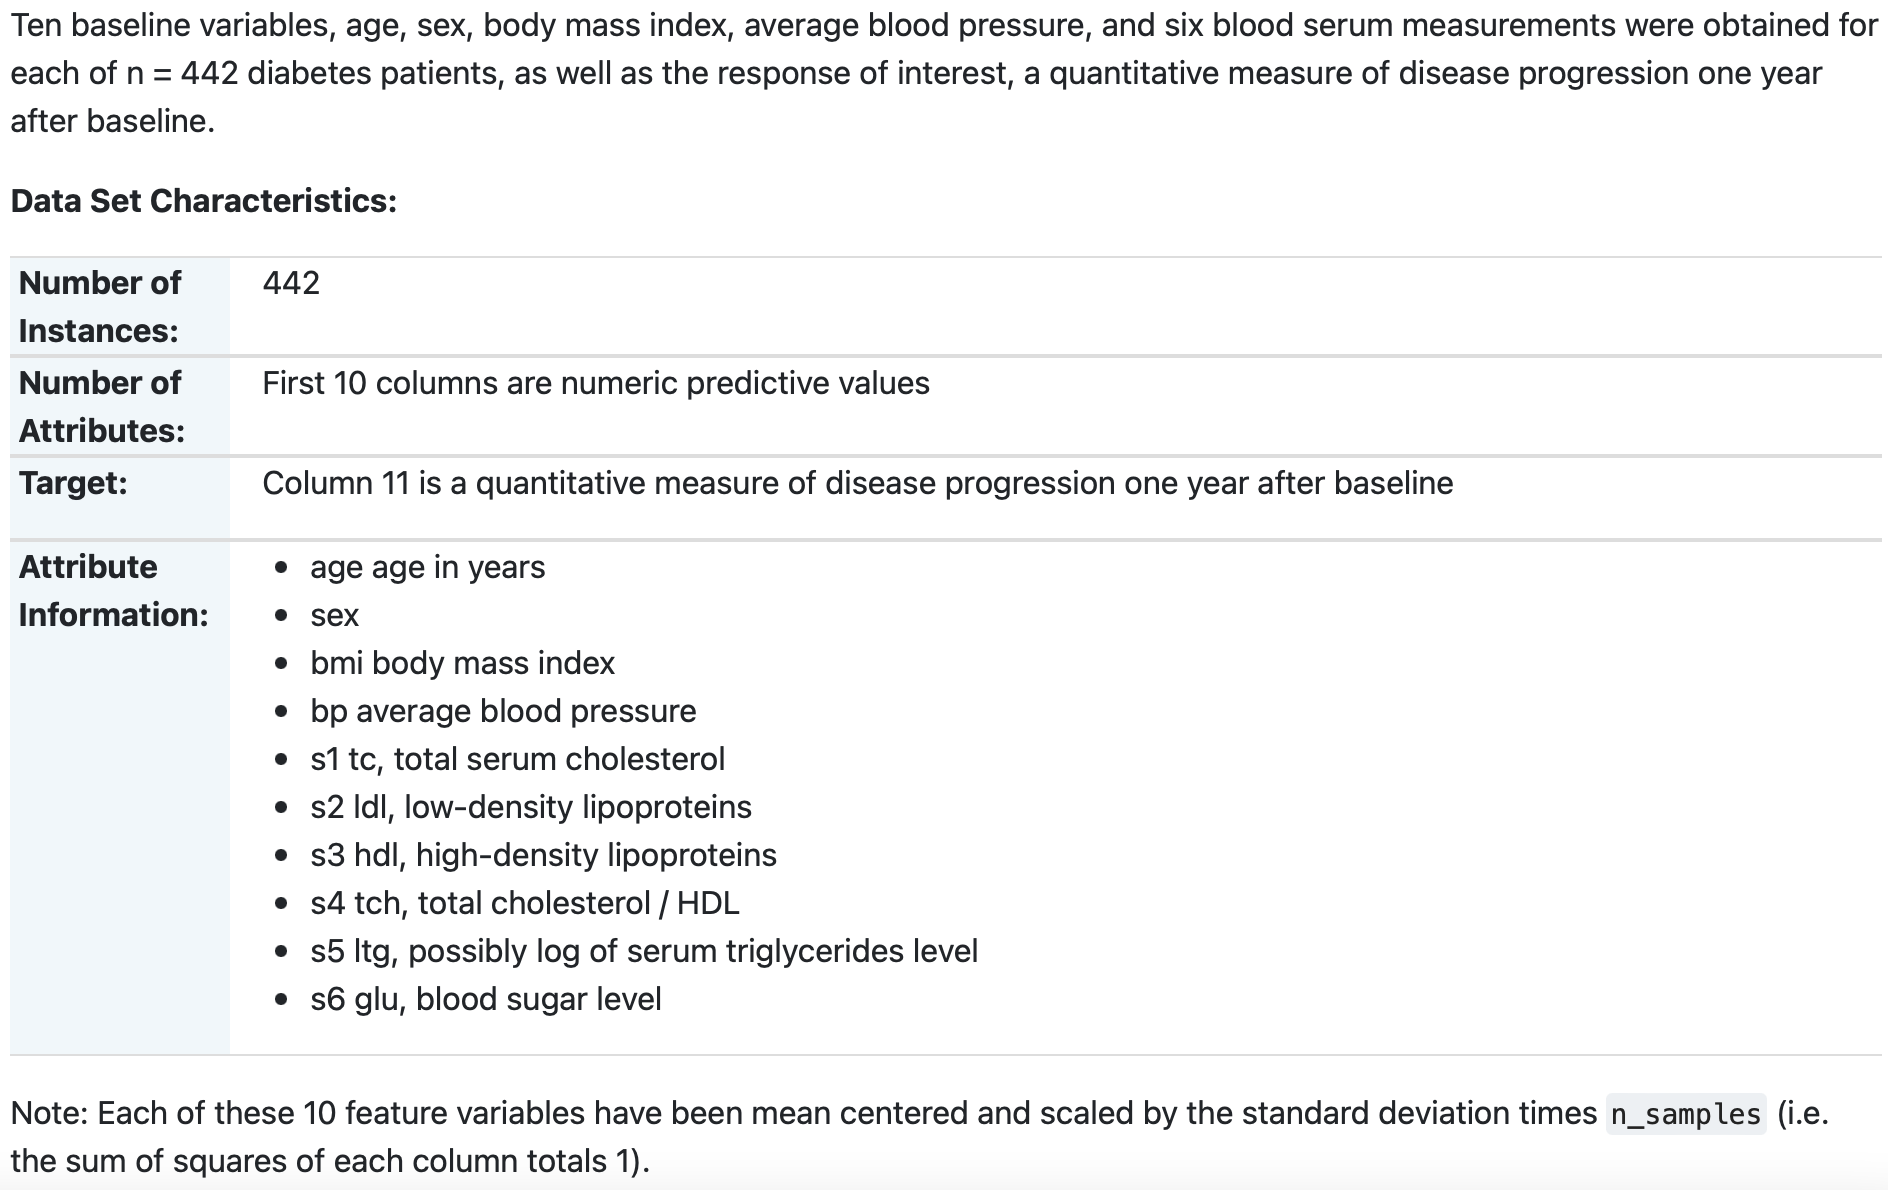

In [ ]:
import matplotlib.pyplot as plt #plots
import numpy as np #matlab de python
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #MSE función de costo

# Load the diabetes dataset
diabetes_X_all, diabetes_y = datasets.load_diabetes(return_X_y=True)

#Visualizing the dataset
#import numpy as np
from tabulate import tabulate
headers = ['age','sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'output']
complete_table = np.column_stack([diabetes_X_all, diabetes_y])
table = tabulate(complete_table[0:9,:], headers, tablefmt="fancy_grid")
print ("Visualizing first 10 rows")
print(table)


Visualizing first 10 rows
╒═════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════╤═════════════╤═════════════╤═════════════╤══════════╕
│         age │        sex │         bmi │          bp │          s1 │          s2 │           s3 │          s4 │          s5 │          s6 │   output │
╞═════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪═════════════╪═════════════╪═════════════╪══════════╡
│  0.0380759  │  0.0506801 │  0.0616962  │  0.0218724  │ -0.0442235  │ -0.0348208  │ -0.0434008   │ -0.00259226 │  0.0199075  │ -0.0176461  │      151 │
├─────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┼─────────────┼─────────────┼─────────────┼──────────┤
│ -0.00188202 │ -0.0446416 │ -0.0514741  │ -0.0263275  │ -0.00844872 │ -0.0191633  │  0.0744116   │ -0.0394934  │ -0.0683315  │ -0.092204   │       75 │
├─────────────┼────────────┼─────────────┼─────────────┼

Coefficients: 
 theta_1 =  [44.64921599]  theta_0  =  153.36255924170615
Mean squared error (MSE Cost): 2548.07
Coefficient of determination: 0.47


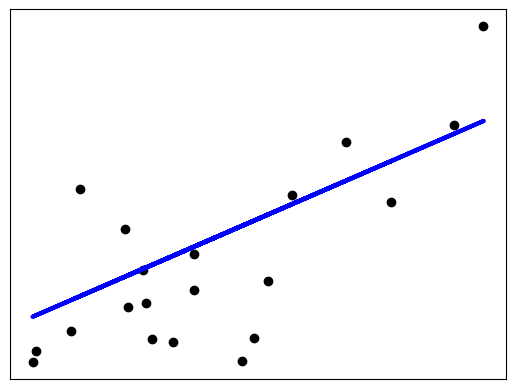

In [ ]:
# Use only one feature, feature 2. bmi
diabetes_X = np.reshape(diabetes_X_all[:, 2], (-1, 1)) #column vector

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:] #last 20 for test

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# normalize data to have zero mean and std one (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #zscore
scaler.fit(diabetes_X_train)# scaler fit is just for training dataset
diabetes_X_train_normalized = scaler.transform(diabetes_X_train) #normalize training set

# Train the model using the training sets
regr.fit(diabetes_X_train_normalized, diabetes_y_train) # 1. REPRESENTAR hypothesis, 2. EVALUAR MSE Error Cuadr[atico Medio 3. OPTIMIZAR (Gradient Descent)

# Make predictions using the testing set
#scaler.fit(diabetes_X_test) #EQUIVOCADO, NOOOO!!!
diabetes_X_test_normalized = scaler.transform(diabetes_X_test) #normalize test set (do not fit scaler again!)
diabetes_y_pred = regr.predict(diabetes_X_test_normalized)

# The coefficients theta_0 (inter.), theta_1 (pendiente)
print("Coefficients: \n", "theta_1 = ", regr.coef_, " theta_0  = ", regr.intercept_)
# The mean squared error
print("Mean squared error (MSE Cost): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction, varía entre 0 y 1
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test_normalized, diabetes_y_test, color="black")
plt.plot(diabetes_X_test_normalized, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



# Actividad 1

Utilizando la base de datos del punto anterior, implemente un regresor lineal de múltiples variables. Use todas las características de la base de datos. Calcule el MSE y el score R2 en el conjunton de test. Use el mismo conjunto de entrenamiento y test del punto anterior. Mejoró el valor de R2 respecto del punto anterior? Razone el por qué. Cuál es la característica más importante para determinar la salida? Por qué? (Tip: observe los valores de theta)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data  # Features
diabetes_y = diabetes.target  # Target variable

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Normalize data to have zero mean and unit variance (feature scaling)
scaler = StandardScaler()
scaler.fit(diabetes_X_train)
diabetes_X_train_normalized = scaler.transform(diabetes_X_train)
diabetes_X_test_normalized = scaler.transform(diabetes_X_test)

# Train the model using the training sets
regr.fit(diabetes_X_train_normalized, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test_normalized)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error (MSE): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R^2): %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Mounted at /content/drive
Coefficients: 
 [ 1.46310428e-02 -1.13009616e+01  2.42956765e+01  1.55988695e+01
 -3.86340722e+01  2.33844729e+01  4.81799577e+00  8.79936443e+00
  3.56444973e+01  3.60661878e+00]
Mean squared error (MSE): 2004.52
Coefficient of determination (R^2): 0.59


Si podemos ver mejoras facilmente en R2 con respecto al punto anterior


# Actividad 2

Repitan la Actividad 1, usando https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.partial_fit . Usen minibatch GD con .partial_fit. Grafiquen Loss vs Iterations.
Tip: https://stackoverflow.com/questions/63660682/batch-size-and-number-of-epochs-in-partial-fit-in-sklearn-sgdregressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Coefficients: 
 [  0.48497672 -10.7441925   24.7519799   15.84754766  -8.91174313
   0.22374372  -8.4028301    5.44775737  24.03479948   3.96333076]
Mean squared error (MSE): 2029.68
Coefficient of determination (R^2): 0.58


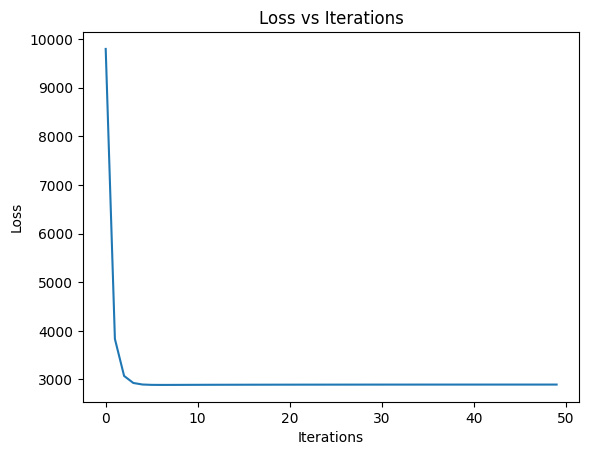

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data  # Features
diabetes_y = diabetes.target  # Target variable

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Normalize data to have zero mean and unit variance (feature scaling)
scaler = StandardScaler()
scaler.fit(diabetes_X_train)
diabetes_X_train_normalized = scaler.transform(diabetes_X_train)
diabetes_X_test_normalized = scaler.transform(diabetes_X_test)

# Initialize SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, loss='squared_error')

# Mini-batch GD with partial_fit
batch_size = 20
num_samples = diabetes_X_train_normalized.shape[0]
num_epochs = 50
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i in range(0, num_samples, batch_size):
        X_batch = diabetes_X_train_normalized[i:i+batch_size]
        y_batch = diabetes_y_train[i:i+batch_size]
        sgd_regressor.partial_fit(X_batch, y_batch)
        y_pred_batch = sgd_regressor.predict(X_batch)
        epoch_loss += mean_squared_error(y_batch, y_pred_batch) * len(y_batch)
    epoch_loss /= num_samples  # Compute average loss per sample
    losses.append(epoch_loss)

# Make predictions using the testing set
diabetes_y_pred = sgd_regressor.predict(diabetes_X_test_normalized)

# The coefficients
print("Coefficients: \n", sgd_regressor.coef_)
# The mean squared error
print("Mean squared error (MSE): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R^2): %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot Loss vs Iterations
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()